### Results comparison and visuals

#### import packages

In [58]:
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.patches import Patch

import seaborn as sns

import numpy as np

#### import results

In [1]:
#import results

%store -r w2v_title_SVM
%store -r w2v_title_lr
%store -r w2v_title_gnb
%store -r w2v_title_mnb

%store -r w2v_text_SVM
%store -r w2v_text_lr
%store -r w2v_text_gnb
%store -r w2v_text_mnb

%store -r tfidf_title_SVM
%store -r tfidf_title_lr
%store -r tfidf_title_mnb

%store -r tfidf_text_SVM
%store -r tfidf_text_lr
%store -r tfidf_text_mnb


#### create data frame with all results

In [6]:
#create data frame with all results

all_results = pd.concat([w2v_title_SVM,
                     w2v_title_lr,
                     w2v_title_gnb,
                     w2v_title_mnb,
                     w2v_text_SVM,
                     w2v_text_lr,
                     w2v_text_gnb,
                     w2v_text_mnb,
                     tfidf_title_SVM,
                     tfidf_title_lr,
                     tfidf_title_mnb,
                     tfidf_text_SVM,
                     tfidf_text_lr,
                     tfidf_text_mnb])

In [76]:
all_results['model type'] = all_results['model type'].str.replace('multinomial Naive-Bayes', 'MN N-B')
all_results['model type'] = all_results['model type'].str.replace('gaussian Naive-Bayes', 'G N-B')
all_results['model type'] = all_results['model type'].str.replace('logistic regression', 'logReg')

In [75]:
all_results.sort_values(by=['recall'], ascending=False)

,data type,model type,vectorize type,accuracy,precision,recall,f1,fit time
0,text,SVM,TF-IDF,0.947231,0.938426,0.942883,0.940649,2539.437500
0,text,logReg,TF-IDF,0.938407,0.929789,0.931459,0.930623,5.078125
0,text,SVM,word2vec,0.894290,0.876810,0.886151,0.881455,188.765625
0,title,SVM,TF-IDF,0.890818,0.877782,0.875754,0.876767,162.656250
0,title,logReg,TF-IDF,0.881368,0.872763,0.857528,0.865078,0.546875
0,title,SVM,word2vec,0.863893,0.846065,0.847260,0.846662,270.812500
0,text,MN N-B,TF-IDF,0.851768,0.829836,0.837505,0.833653,0.031250
0,title,MN N-B,TF-IDF,0.860079,0.859997,0.817610,0.838268,0.000000
0,text,logReg,word2vec,0.837138,0.820630,0.809781,0.815169,3.484375
0,title,logReg,word2vec,0.817100,0.807827,0.771018,0.788993,3.453125


#### data frame with text results

In [123]:
#create data frame with text results

text_results = all_results[all_results['data type']== 'text']
text_results_sorted = text_results.sort_values(by=['recall'], ascending=False)
text_results



,data type,model type,vectorize type,accuracy,precision,recall,f1,fit time
0,text,SVM,word2vec,0.894290,0.876810,0.886151,0.881455,188.765625
0,text,logReg,word2vec,0.837138,0.820630,0.809781,0.815169,3.484375
0,text,G N-B,word2vec,0.760972,0.734037,0.723014,0.728484,0.093750
0,text,MN N-B,word2vec,0.737861,0.756687,0.602747,0.671001,0.031250
0,text,SVM,TF-IDF,0.947231,0.938426,0.942883,0.940649,2539.437500
0,text,logReg,TF-IDF,0.938407,0.929789,0.931459,0.930623,5.078125
0,text,MN N-B,TF-IDF,0.851768,0.829836,0.837505,0.833653,0.031250


In [124]:
# melt text df for plotting

melted_text = pd.melt(frame = text_results,
             id_vars = ['model type', 'vectorize type'],
             var_name = 'statistic',
             value_name = 'value',
             value_vars=['accuracy', 'precision', 'recall', 'f1'])

In [140]:
#filter melted data frame for vectorization type

melted_text_word2vec = melted_text.loc[melted_text['vectorize type']=='word2vec']

melted_text_tfidf = melted_text.loc[melted_text['vectorize type']=='TF-IDF']

<Axes: title={'center': 'word2vec'}, xlabel='model type', ylabel='value'>

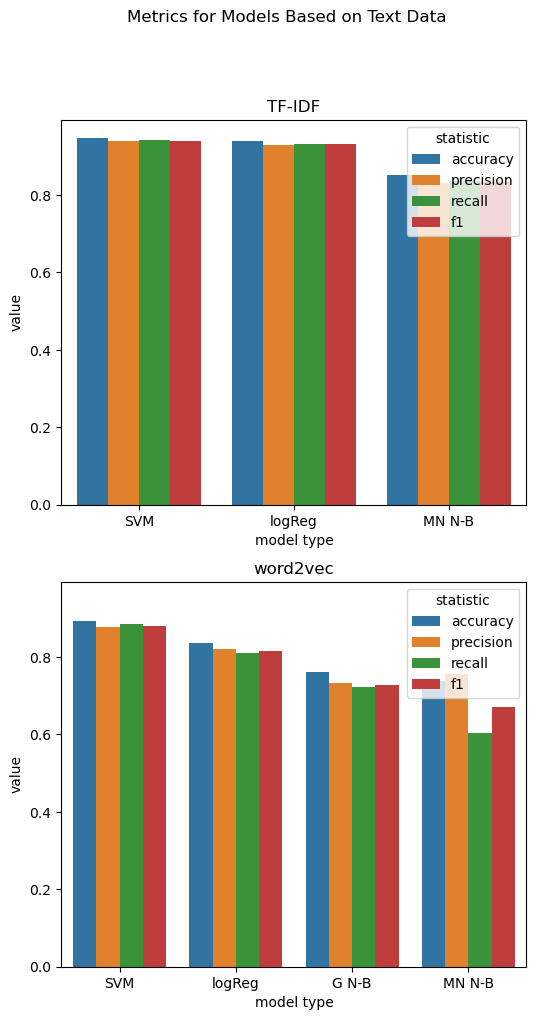

In [151]:
fig, axes = plt.subplots(2,1, figsize=(6, 11), sharey=True)
fig.suptitle('Metrics for Models Based on Text Data')
axes[0].set_title("TF-IDF")
sns.barplot(ax=axes[0], data=melted_text_tfidf, x='model type', y='value', hue='statistic')

axes[1].set_title("word2vec")
sns.barplot(ax=axes[1], data=melted_text_word2vec, x='model type', y='value', hue='statistic')



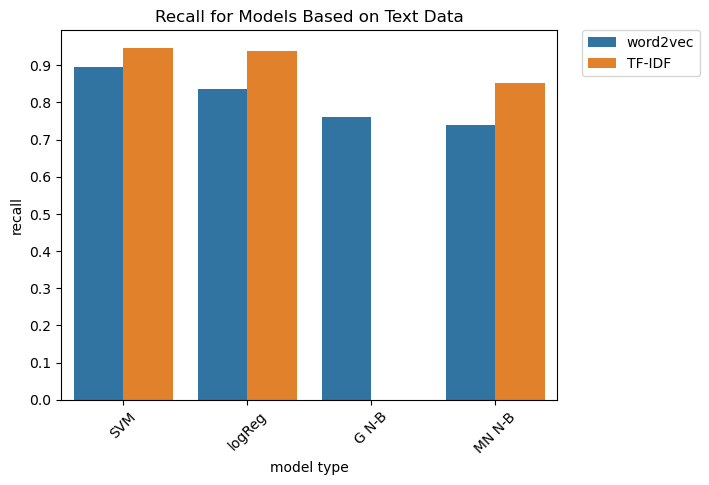

In [ ]:
ax = sns.barplot(x='model type', y='accuracy', data=text_results, hue='vectorize type')
plt.title("Recall for Models Based on Text Data")
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 1, step=0.1))
plt.ylabel("recall")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

#marker="o", ci=None

#### title results

In [174]:
#create data frame with text results

title_results = all_results[all_results['data type']== 'title']
title_results_sorted_recall = title_results.sort_values(by=['recall'], ascending=False)
title_results



,data type,model type,vectorize type,accuracy,precision,recall,f1,fit time
0,title,SVM,word2vec,0.863893,0.846065,0.847260,0.846662,270.812500
0,title,logReg,word2vec,0.817100,0.807827,0.771018,0.788993,3.453125
0,title,G N-B,word2vec,0.781351,0.750190,0.760108,0.755116,0.078125
0,title,MN N-B,word2vec,0.706154,0.871433,0.395841,0.544395,0.062500
0,title,SVM,TF-IDF,0.890818,0.877782,0.875754,0.876767,162.656250
0,title,logReg,TF-IDF,0.881368,0.872763,0.857528,0.865078,0.546875
0,title,MN N-B,TF-IDF,0.860079,0.859997,0.817610,0.838268,0.000000


In [152]:
#melt text df for plotting

melted_title = pd.melt(frame = title_results,
             id_vars = ['model type', 'vectorize type'],
             var_name = 'statistic',
             value_name = 'value',
             value_vars=['accuracy', 'precision', 'recall', 'f1'])

In [154]:
#filter melted data frame for vectorization type

melted_title_word2vec = melted_title.loc[melted_title['vectorize type']=='word2vec']

melted_title_tfidf = melted_title.loc[melted_title['vectorize type']=='TF-IDF']

In [159]:
melted_title_word2vec

,model type,vectorize type,statistic,value
0,SVM,word2vec,accuracy,0.863893
1,logReg,word2vec,accuracy,0.817100
2,G N-B,word2vec,accuracy,0.781351
3,MN N-B,word2vec,accuracy,0.706154
7,SVM,word2vec,precision,0.846065
8,logReg,word2vec,precision,0.807827
9,G N-B,word2vec,precision,0.750190
10,MN N-B,word2vec,precision,0.871433
14,SVM,word2vec,recall,0.847260
15,logReg,word2vec,recall,0.771018


<Axes: title={'center': 'word2vec'}, xlabel='model type', ylabel='value'>

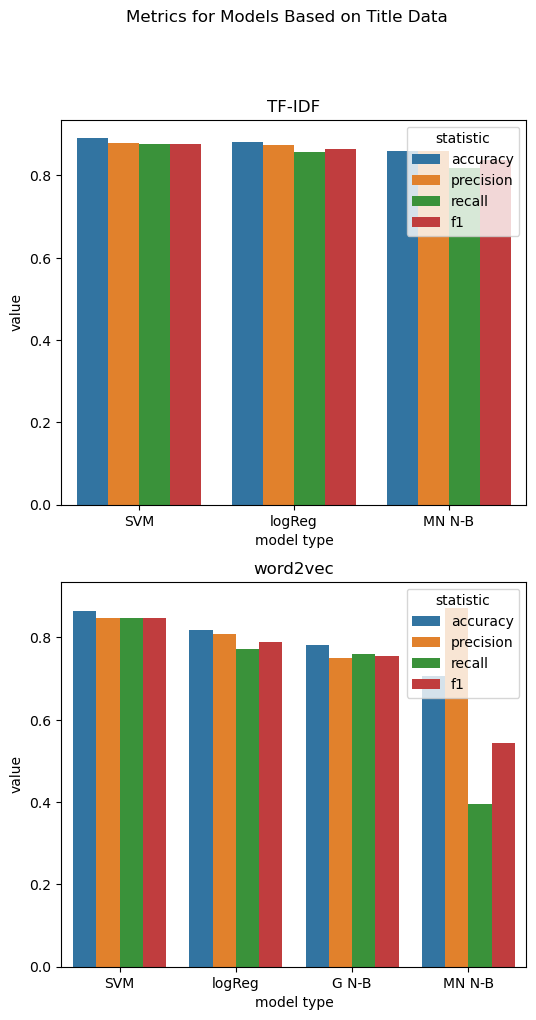

In [155]:
fig, axes = plt.subplots(2,1, figsize=(6, 11), sharey=True)
fig.suptitle('Metrics for Models Based on Title Data')
axes[0].set_title("TF-IDF")
sns.barplot(ax=axes[0], data=melted_title_tfidf, x='model type', y='value', hue='statistic')

axes[1].set_title("word2vec")
sns.barplot(ax=axes[1], data=melted_title_word2vec, x='model type', y='value', hue='statistic')



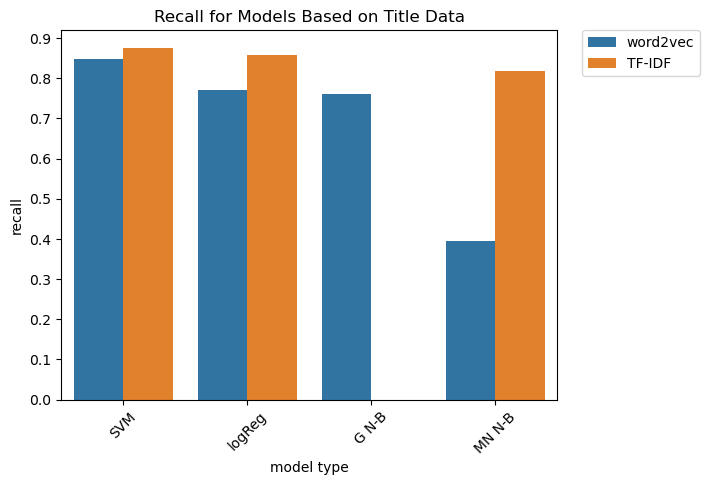

In [157]:
#sns.countplot(x="model type", y='recall', hue="vectorize type", data=text_results)

ax = sns.barplot(x='model type', y='recall', data=title_results, hue='vectorize type')
plt.title("Recall for Models Based on Title Data")
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 1, step=0.1))
plt.ylabel("recall")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

#marker="o", ci=None

### word2vec vs TF-IDF

In [22]:
#create data frame with word2vec results

word2vec_results = all_results[all_results['vectorize type']== 'word2vec']
word2vec_results.sort_values(by=['recall'], ascending=False)

,data type,model type,vectorize type,accuracy,precision,recall,f1,fit time
0,text,SVM,word2vec,0.894290,0.876810,0.886151,0.881455,188.765625
0,title,SVM,word2vec,0.863893,0.846065,0.847260,0.846662,270.812500
0,text,logistic regression,word2vec,0.837138,0.820630,0.809781,0.815169,3.484375
0,title,logistic regression,word2vec,0.817100,0.807827,0.771018,0.788993,3.453125
0,title,gaussian Naive-Bayes,word2vec,0.781351,0.750190,0.760108,0.755116,0.078125
0,text,gaussian Naive-Bayes,word2vec,0.760972,0.734037,0.723014,0.728484,0.093750
0,text,multinomial Naive-Bayes,word2vec,0.737861,0.756687,0.602747,0.671001,0.031250
0,title,multinomial Naive-Bayes,word2vec,0.706154,0.871433,0.395841,0.544395,0.062500


In [23]:
#create data frame with TF-IDF results

TFIDF_results = all_results[all_results['vectorize type']== 'TF-IDF']
TFIDF_results.sort_values(by=['recall'], ascending=False)

,data type,model type,vectorize type,accuracy,precision,recall,f1,fit time
0,text,SVM,TF-IDF,0.947231,0.938426,0.942883,0.940649,2539.437500
0,text,logistic regression,TF-IDF,0.938407,0.929789,0.931459,0.930623,5.078125
0,title,SVM,TF-IDF,0.890818,0.877782,0.875754,0.876767,162.656250
0,title,logistic regression,TF-IDF,0.881368,0.872763,0.857528,0.865078,0.546875
0,text,multinomial Naive-Bayes,TF-IDF,0.851768,0.829836,0.837505,0.833653,0.031250
0,title,multinomial Naive-Bayes,TF-IDF,0.860079,0.859997,0.817610,0.838268,0.000000


### title vs text

In [163]:
# melt text df for plotting

melted_text_title = pd.melt(frame = all_results,
             id_vars = ['model type', 'data type', 'vectorize type'],
             var_name = 'statistic',
             value_name = 'value',
             value_vars='recall')

In [164]:
melted_text_title

,model type,data type,vectorize type,statistic,value
0,SVM,title,word2vec,recall,0.847260
1,logReg,title,word2vec,recall,0.771018
2,G N-B,title,word2vec,recall,0.760108
3,MN N-B,title,word2vec,recall,0.395841
4,SVM,text,word2vec,recall,0.886151
5,logReg,text,word2vec,recall,0.809781
6,G N-B,text,word2vec,recall,0.723014
7,MN N-B,text,word2vec,recall,0.602747
8,SVM,title,TF-IDF,recall,0.875754
9,logReg,title,TF-IDF,recall,0.857528


In [170]:
#filter melted data frame for vectorization method

melted_titletext_word2vec = melted_text_title.loc[melted_text_title['vectorize type']=='word2vec']

melted_titletext_tfidf = melted_text_title.loc[melted_text_title['vectorize type']=='TF-IDF']

<Axes: title={'center': 'word2vec'}, xlabel='model type', ylabel='value'>

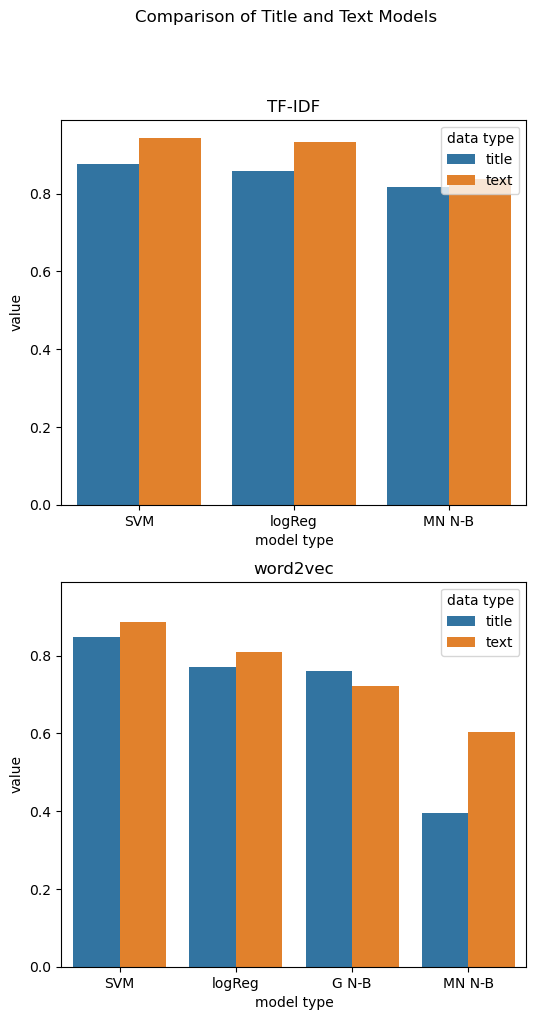

In [173]:
fig, axes = plt.subplots(2,1, figsize=(6, 11), sharey=True)
fig.suptitle('Comparison of Title and Text Models')
axes[0].set_title("TF-IDF")
sns.barplot(ax=axes[0], data=melted_titletext_tfidf, x='model type', y='value', hue='data type')

axes[1].set_title("word2vec")
sns.barplot(ax=axes[1], data=melted_titletext_word2vec, x='model type', y='value', hue='data type')

### fit time

In [175]:
all_results.sort_values(by=['fit time'], ascending=False)


,data type,model type,vectorize type,accuracy,precision,recall,f1,fit time
0,text,SVM,TF-IDF,0.947231,0.938426,0.942883,0.940649,2539.437500
0,title,SVM,word2vec,0.863893,0.846065,0.847260,0.846662,270.812500
0,text,SVM,word2vec,0.894290,0.876810,0.886151,0.881455,188.765625
0,title,SVM,TF-IDF,0.890818,0.877782,0.875754,0.876767,162.656250
0,text,logReg,TF-IDF,0.938407,0.929789,0.931459,0.930623,5.078125
0,text,logReg,word2vec,0.837138,0.820630,0.809781,0.815169,3.484375
0,title,logReg,word2vec,0.817100,0.807827,0.771018,0.788993,3.453125
0,title,logReg,TF-IDF,0.881368,0.872763,0.857528,0.865078,0.546875
0,text,G N-B,word2vec,0.760972,0.734037,0.723014,0.728484,0.093750
0,title,G N-B,word2vec,0.781351,0.750190,0.760108,0.755116,0.078125
